In [14]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

c:\Users\user\Desktop\hw3digital\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


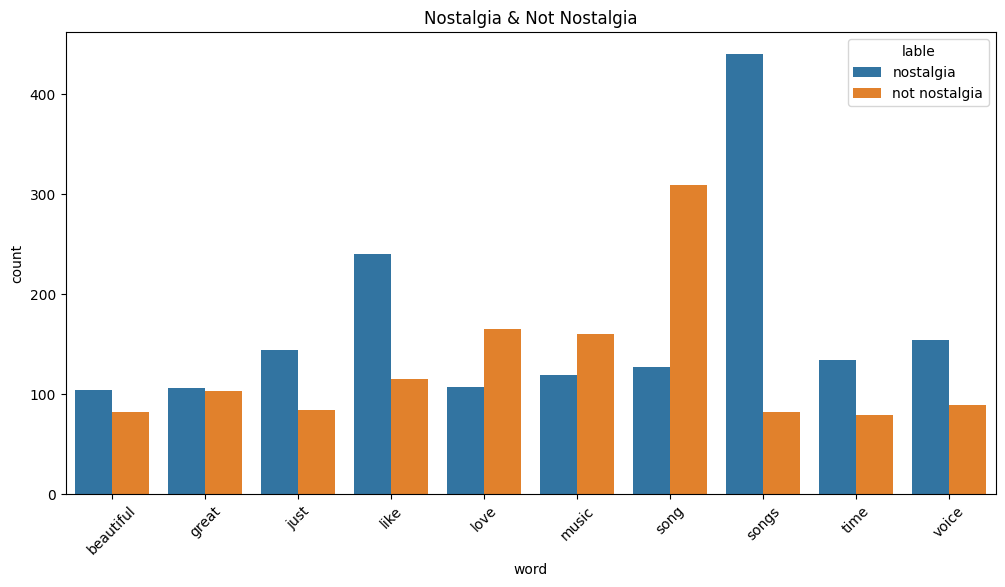

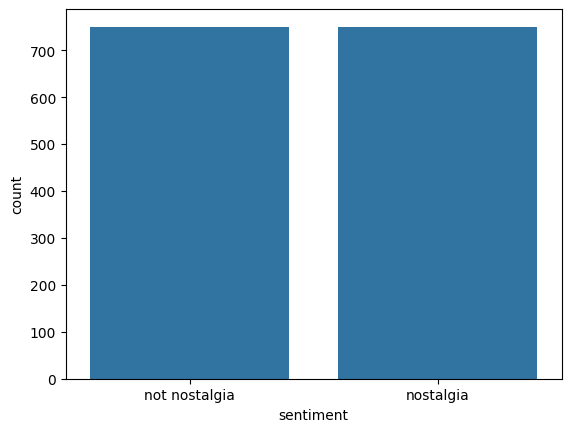

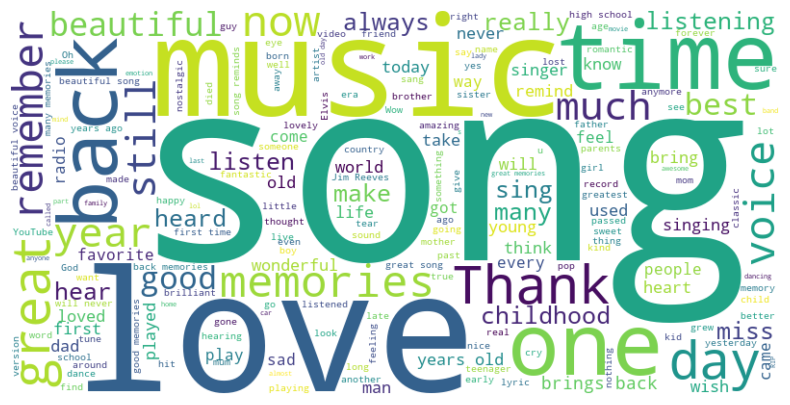

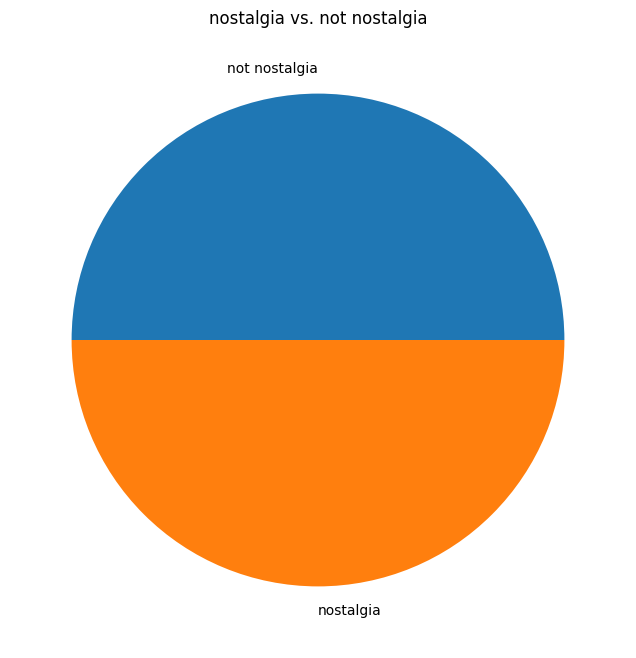

In [1]:
#參考資料:
#受到上課的那個匿名問答網站啟發(會有詞雲那個我忘記名字了)
# 詞雲:https://www.delftstack.com/zh-tw/howto/python/word-cloud-python/
# 圓餅圖:https://steam.oxxostudio.tw/category/python/example/matplotlib-pie.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = pd.DataFrame(dataset['train'])

nostalgia_comments = df[df['sentiment'] == 'nostalgia']['comment']
not_nostalgia_comments = df[df['sentiment'] == 'not nostalgia']['comment']

# CountVectorizer詞頻
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # max_features=10 表示取出最常見的10個詞
nostalgia_word_counts = vectorizer.fit_transform(nostalgia_comments).toarray().sum(axis=0)
not_nostalgia_word_counts = vectorizer.fit_transform(not_nostalgia_comments).toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()
nostalgia_df = pd.DataFrame({'word': words, 'count': nostalgia_word_counts, 'label': 'nostalgia'})
not_nostalgia_df = pd.DataFrame({'word': words, 'count': not_nostalgia_word_counts, 'label': 'not nostalgia'})
word_counts_df = pd.concat([nostalgia_df, not_nostalgia_df])

# 畫出長條圖
plt.figure(figsize=(12, 6))
sns.barplot(data=word_counts_df, x='word', y='count', hue='label')
plt.title('Nostalgia & Not Nostalgia')
plt.legend(title='lable')
plt.xticks(rotation=45)
plt.show()
sns.countplot(data=df, x='sentiment')
plt.show()

# 詞雲
all_text = ' '.join(df['comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 計算情感標籤的比例
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels)
plt.title('nostalgia vs. not nostalgia')
plt.show()


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
#參考:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])
y = df['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)
print(y.shape)
print(X_tfidf)

(1500,)
  (np.int32(0), np.int32(1598))	0.10513385901190023
  (np.int32(0), np.int32(3570))	0.13957868665289525
  (np.int32(0), np.int32(2973))	0.133379582278289
  (np.int32(0), np.int32(3650))	0.09118405957610763
  (np.int32(0), np.int32(1470))	0.17742037513225833
  (np.int32(0), np.int32(3534))	0.10537072896744779
  (np.int32(0), np.int32(3282))	0.08100665209874867
  (np.int32(0), np.int32(2028))	0.0842729676163571
  (np.int32(0), np.int32(3336))	0.05657407634385312
  (np.int32(0), np.int32(1606))	0.11892494345450205
  (np.int32(0), np.int32(233))	0.19792327047870298
  (np.int32(0), np.int32(3284))	0.1516729120243016
  (np.int32(0), np.int32(3328))	0.18799137008070552
  (np.int32(0), np.int32(1651))	0.22762334468523981
  (np.int32(0), np.int32(1512))	0.09516329916083405
  (np.int32(0), np.int32(1249))	0.198518136483349
  (np.int32(0), np.int32(323))	0.10633708427990492
  (np.int32(0), np.int32(214))	0.14662963513401264
  (np.int32(0), np.int32(2341))	0.06161098737789328
  (np.int32(0

In [13]:
#參考:https://pyecontech.com/2020/03/06/python_bayesian_classifier/
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from datasets import load_dataset

dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = pd.DataFrame(dataset['train'])

df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)
X = df['comment']
y = df['label']


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 詞頻
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Multinomial
nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train)
y_pred_count = nb_count.predict(X_test_counts)
print("Multinomial NB_詞頻:")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("\nMultinomial NB_TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

# Bernoulli
nb_count1 = BernoulliNB()
nb_count1.fit(X_train_counts, y_train)
y_pred_count = nb_count1.predict(X_test_counts)
print("Bernoulli NB_詞頻:")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))

nb_tfidf1 = BernoulliNB()
nb_tfidf1.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf1.predict(X_test_tfidf)
print("\nBernoulli NB_TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


Multinomial NB_詞頻:
Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       148
           1       0.78      0.95      0.86       152

    accuracy                           0.84       300
   macro avg       0.86      0.84      0.83       300
weighted avg       0.86      0.84      0.83       300


Multinomial NB_TF-IDF:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       148
           1       0.77      0.96      0.85       152

    accuracy                           0.83       300
   macro avg       0.86      0.83      0.83       300
weighted avg       0.86      0.83      0.83       300

Bernoulli NB_詞頻:
Accuracy: 0.8766666666666667
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       148
           1       0.83      0.95      0.89       152

    accuracy                       